## 回帰とは

* 機械学習の手法は、**教師あり学習** と **教師なし学習** に分類でき、  
更に教師あり学習は、 **回帰** と **分類** の問題に分けることができる。
* **回帰** は、入力に対して連続した数値を対応付ける手法で、  
ざっくり言うと最適な関数を導き出して予測すること。

## やること

以下の[対象データ](#対象データ)を使って、上体起こしの回数に対する回帰モデルを作ってみる。

### モデルを作る?

入力データに対して最適な予測値を出す関数とそのパラメータを決定すること。  

$$
y = a_1x_1 + a_2x_2 + a_3x_3 
$$

という3次元の線形な関数を使うこととして、

$$
a_1 = 2,a_2 = 3,a_3 = 4
$$
が最適パラメータだった的な。

## 対象データ

* [DATA GO.JP](http://www.data.go.jp/?lang=japanese)にある[平成27年度_体力・運動能力調査](http://www.data.go.jp/data/dataset/mext_20161209_0038)  
**1日の運動・スポーツ実施時間別体格測定・テストの結果**
 * 性別 男子
 * 実施状況 ほとんど毎日
 * テスト項目 上体起こし

In [1]:
import pandas as pd

pd.DataFrame([
    [6, 117.42, 21.53, 11.60],  
    [7, 123.10, 24.25, 12.79],
    [8, 128.57, 26.76, 14.71],
    [9, 132.81, 30.01, 16.23],
    [10, 138.83, 34.13, 17.86],  
    [11, 144.61, 38.32, 18.09],
    [12, 152.77, 44.46, 20.48],
    [13, 158.35, 48.88, 24.56],
    [14, 164.43, 51.80, 27.28],
    [15, 167.10, 56.58, 26.68],
    [16, 168.95, 57.49, 27.44],
    [17, 170.15, 59.51, 29.59],
    [18, 170.76, 60.16, 29.06],
    [19, 171.56, 61.78, 29.08],
    [20, 171.71, 64.50, 27.01],
    [25, 171.86, 67.17, 26.47],
    [30, 172.23, 68.03, 25.10],
    [35, 171.79, 69.04, 23.35],
    [40, 171.62, 69.75, 22.33],
    [45, 171.12, 69.74, 21.51],
    [50, 170.75, 69.24, 20.32],
    [55, 169.38, 66.08, 22.83],
    [60, 167.72, 64.67, 20.66],
    [65, 165.84, 62.54, 16.19]
],
columns=('年齢','身長(cm)','体重(kg)','回数')
)

,年齢,身長(cm),体重(kg),回数
0,6,117.42,21.53,11.60
1,7,123.10,24.25,12.79
2,8,128.57,26.76,14.71
3,9,132.81,30.01,16.23
4,10,138.83,34.13,17.86
5,11,144.61,38.32,18.09
6,12,152.77,44.46,20.48
7,13,158.35,48.88,24.56
8,14,164.43,51.80,27.28
9,15,167.10,56.58,26.68


## 目的関数

予測の精度判断に使用する **目的関数** を決める。 今回は **平均二乗誤差** を使う

### 平均二乗誤差

* 以下MSE(mean squire error)と表記する場合がある
* 標準偏差SD(standard deviation) = $SD = \sqrt{MSE}$
* 入力データ($t_n$)とモデルから得られた値($y_n$)の二乗誤差の和を入力データ数($N$)で割った値
* この値が **最小** のものが最適
$$
J=\frac{1}{N}\sum_{n=0}^{N-1} (y_n - t_n)^2
$$


## 1次元直線モデル

まずは、年齢だけを入力データとしたモデルを作成する  
(もうプロットしたデータを見た時点で、単純な1次元直線じゃ無理だとわかるがやる)

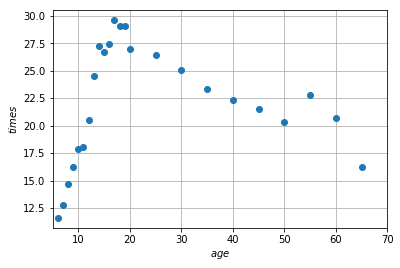

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ages = np.array([
    6, 7, 8, 9, 10,
    11, 12, 13, 14, 15,
    16, 17, 18, 19, 20,
    25, 30, 35, 40, 45, 
    50, 55, 60, 65
])
times = np.array([
    11.60, 12.79, 14.71, 16.23, 17.86,
    18.09, 20.48, 24.56, 27.28, 26.68, 
    27.44, 29.59, 29.06, 29.08, 27.01, 
    26.47, 25.10, 23.35, 22.33, 21.51,
    20.32, 22.83, 20.66, 16.19])

age_min = 5
age_max = 70

plt.plot(ages, times, marker='o', linestyle='None')
plt.xlim(age_min, age_max)
plt.grid(True)
plt.xlabel('$age$')
plt.ylabel('$times$')
plt.show()

モデル(直線)の式は以下であり、平均二乗誤差($J$)が最小になる$w_{0}$と$w_{1}$を見つける
$$
y(x) = w_{0}x + w_{1}
$$


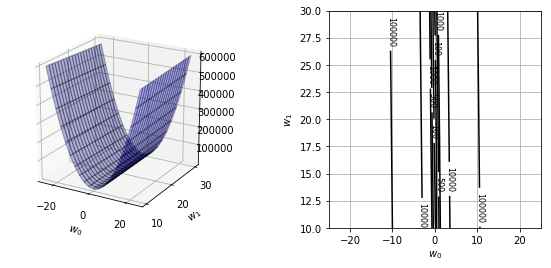

min J([89],[100])=31.31979648114931, w0=0.12562814070351536, w1=18.944723618090453


In [3]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

# 平均誤差関数
def mse_line(x, t, w):
    y = w[0] * x + w[1]
    mse = np.mean((y - t)**2)
    return mse

# 計算
xn = 200
w0 = np.linspace(-25, 25, xn)
w1 = np.linspace(10, 30, xn)
## 格子作成
ww0, ww1 = np.meshgrid(w0, w1)
J = np.zeros((len(w0), len(w1)))
for i0 in range(xn):
    for i1 in range(xn):
        J[i1, i0] = mse_line(ages, times, (w0[i0], w1[i1]))

# 表示
plt.figure(figsize=(9.5, 4))
## sublot間の横幅の空き(wspace)
plt.subplots_adjust(wspace=0.5)

## 平均二乗誤差 J
ax = plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(ww0, ww1, J, rstride=10, cstride=10, alpha=0.3, color='blue', edgecolor='black')
ax.set_xticks([-20, 0, 20])
ax.set_yticks([10, 20, 30])
ax.set_xlabel('$w_{0}$')
ax.set_ylabel('$w_{1}$')
ax.view_init(20, -60)

## 平均二乗誤差Jの等高線表示
plt.subplot(1, 2, 2)
cont = plt.contour(ww0, ww1, J, 5, colors='black', levels=[100, 500, 1000, 10000, 100000])
cont.clabel(fmt='%1.0f', fontsize=8)
plt.grid(True)
plt.xlabel('$w_{0}$')
plt.ylabel('$w_{1}$')
plt.show()

## Jの最小値
minJ = J.min()
minJIndex = np.where(J == minJ)
w = (w0[minJIndex[1][0]], w1[minJIndex[0][0]])
print('min J({0},{1})={2}, w0={3}, w1={4}'
      .format(minJIndex[0], minJIndex[1], minJ, w[0], w[1]))

上記で求めた$w_{0}$と$w_{1}$で直線書いてみる。

w0=0.126, w1=18.945
SD=5.596 cm


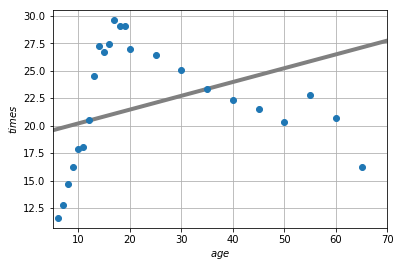

In [6]:
# 線の表示
def show_line(w):
    xb = np.linspace(age_min, age_max, 100)
    y = w[0]* xb + w[1]
    plt.plot(xb, y, color=(.5, .5, .5), linewidth=4)

W = np.array([w[0], w[1]])
mse = mse_line(ages, times, W)
print("w0={0:.3f}, w1={1:.3f}".format(w[0], w[1]))
print("SD={0:.3f} cm".format(np.sqrt(mse)))
show_line(W)
plt.plot(ages, times, marker='o', linestyle='None')
plt.xlim(age_min, age_max)
plt.grid(True)
plt.xlabel('$age$')
plt.ylabel('$times$')
plt.show()

まぁこんなかんじになるよね・・  
次は入力変数に身長を追加してモデルを作ってみる。

## 2次元面モデル